In [66]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [67]:
df = pd.read_csv('../DATA/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [68]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [70]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [71]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

The 'society' feature has NaN values for almost half of the dataframe. We cannot impute data for this feature. Let's drop it

In [72]:
df.drop('society',axis=1,inplace=True)

<AxesSubplot:>

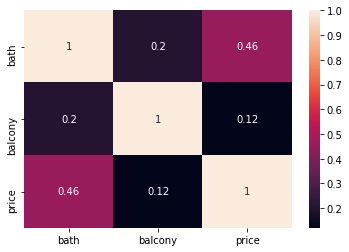

In [73]:
sns.heatmap(data=df.corr(),annot=True)

'balcony' has a positive correlation with the price as you would guess. The most plausible thing to do is to fill it with 0

In [74]:
df['balcony'] = df['balcony'].fillna(0)

In [75]:
df.isna().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

Every apartment has to have a bath. Let's fill it with 1

In [76]:
df['bath'] = df['bath'].fillna(1)

Let's drop the remaining rows

In [77]:
df = df.dropna()

In [78]:
df.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [79]:
print("shape =",df.shape)

shape = (13303, 8)


In [80]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [81]:
def type_of_house(x):
    return x.split()[1]
df['house_type'] = df['size'].apply(type_of_house)

In [82]:
df.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,house_type
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,Bedroom


In [83]:
df['size'] = df['size'].apply(lambda x:x.split()[0])

In [84]:
df.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,house_type
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07,BHK
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00,Bedroom


In [85]:
def tot(x):
    nos = {'0','1','2','3','4','5','6','7','8','9'}
    if '-' in x:
        a = x.split('-')[0].strip()
        b = x.split('-')[1].strip()
        if '.' in a:
            a = a.split('.')[0]
        if '.' in b:
            b = b.split('.')[0]
        return (int(a)+int(b))/2
    elif type(x) is str:
        y = ''
        for i in x:
            if i=='.':
                break
            elif i in nos:
                y+=i
        return int(y)
df['total_sqft'] = df['total_sqft'].apply(tot)

Since the prices are in lakh we multiply it with that value 

In [86]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,house_type,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,BHK,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,Bedroom,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00,BHK,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,BHK,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00,BHK,4250.000000


In [87]:
df.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [88]:
df.location=df.location.apply(lambda x: x.strip())  #removes extra space
location_stats=df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           540
Sarjapur  Road       397
Electronic City      304
Kanakpura Road       273
Thanisandra          237
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [89]:
#displaying number of locations with a count of less than 10
len(location_stats[location_stats<=10])

1052

In [90]:
locationlessthan10=location_stats[location_stats<=10]
df.location=df.location.apply(lambda x: 'other' if x in locationlessthan10 else x)
len(df.location.unique())

242

In [102]:
df['size'] = df['size'].astype(int)

In [103]:
#finding unrealistic ratio of area to bedroom ratio 
#we consider threshold as 300 which is a typical value consider for any realestate
df[(df['total_sqft']/df['size'])<300]

,area_type,availability,location,size,total_sqft,bath,balcony,price,house_type,price_per_sqft
9,Plot Area,Ready To Move,other,6,1020.0,6.0,0.0,370.0,Bedroom,36274.509804
45,Plot Area,Ready To Move,HSR Layout,8,600.0,9.0,0.0,200.0,Bedroom,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,6,1407.0,4.0,1.0,150.0,Bedroom,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,8,1350.0,7.0,0.0,85.0,Bedroom,6296.296296
70,Plot Area,Ready To Move,other,3,500.0,3.0,2.0,100.0,Bedroom,20000.000000
...,...,...,...,...,...,...,...,...,...,...
13277,Plot Area,Ready To Move,other,7,1400.0,7.0,0.0,218.0,Bedroom,15571.428571
13279,Plot Area,Ready To Move,other,6,1200.0,5.0,0.0,130.0,Bedroom,10833.333333
13281,Plot Area,Ready To Move,Margondanahalli,5,1375.0,5.0,1.0,125.0,Bedroom,9090.909091
13303,Plot Area,Ready To Move,Vidyaranyapura,5,774.0,5.0,3.0,70.0,Bedroom,9043.927649


the above table shows that 8 rooms will fit in 600sqft of area which is not possible so we remove these values

In [107]:
df2=df[~((df['total_sqft']/df['size'])<300)]
df2.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,house_type,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,BHK,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,Bedroom,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00,BHK,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,BHK,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00,BHK,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,2,1170.0,2.0,1.0,38.00,BHK,3247.863248
6,Super built-up Area,18-May,Old Airport Road,4,2732.0,4.0,0.0,204.00,BHK,7467.057101
7,Super built-up Area,Ready To Move,Rajaji Nagar,4,3300.0,4.0,0.0,600.00,BHK,18181.818182
8,Super built-up Area,Ready To Move,Marathahalli,3,1310.0,3.0,1.0,63.25,BHK,4828.244275
10,Super built-up Area,18-Feb,Whitefield,3,1800.0,2.0,2.0,70.00,BHK,3888.888889


In [108]:
#the new cleaned data set is data2
print("data2 shape =",df2.shape)

data2 shape = (12521, 10)


In [109]:
df = df2.copy()

In [110]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price,house_type,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,BHK,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,Bedroom,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00,BHK,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,BHK,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00,BHK,4250.000000
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,3453.0,4.0,0.0,231.00,Bedroom,6689.834926
13316,Super built-up Area,Ready To Move,other,4,3600.0,5.0,0.0,400.00,BHK,11111.111111
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00,BHK,5258.545136
13318,Super built-up Area,18-Jun,Padmanabhanagar,4,4689.0,4.0,1.0,488.00,BHK,10407.336319


'price' is correlated with 'price_per_sqft'. Let's drop 'price'

In [111]:
df.drop('price',axis=1,inplace=True)

In [112]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,house_type,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2.0,1.0,BHK,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,Bedroom,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,BHK,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,BHK,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,BHK,4250.000000
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5,3453.0,4.0,0.0,Bedroom,6689.834926
13316,Super built-up Area,Ready To Move,other,4,3600.0,5.0,0.0,BHK,11111.111111
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,BHK,5258.545136
13318,Super built-up Area,18-Jun,Padmanabhanagar,4,4689.0,4.0,1.0,BHK,10407.336319


<AxesSubplot:>

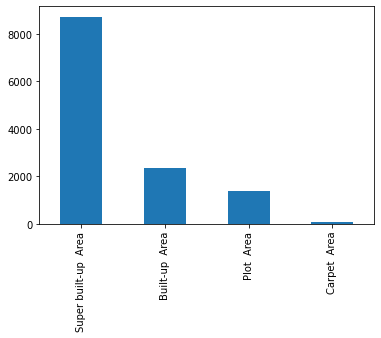

In [114]:
df['area_type'].value_counts().plot(kind='bar')

In [120]:
df[df['availability']=='Ready To Move']['price_per_sqft'].mean(),df[~(df['availability']=='Ready To Move')]['price_per_sqft'].mean()

(6441.585497541806, 5814.889882979567)

From the above cell, the apartments which are ready to be occupied go for a high value than those which are not readily available.

In [121]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       '19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct',
       '21-Jan', '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul',
       '21-Nov', '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep',
       '21-Aug', '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun',
       '17-Feb', '20-Nov', '20-Jul', '16-Sep', '15-Oct', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [124]:
def month(x):
    if x=='Ready To Move':
        return x
    return x.split('-')[1]
df['month_of_availability'] = df['availability'].apply(month)

In [126]:
df.drop('availability',axis=1,inplace=True)

In [127]:
df

,area_type,location,size,total_sqft,bath,balcony,house_type,price_per_sqft,month_of_availability
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,BHK,3699.810606,Dec
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,Bedroom,4615.384615,Ready To Move
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,BHK,4305.555556,Ready To Move
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,BHK,6245.890861,Ready To Move
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,BHK,4250.000000,Ready To Move
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5,3453.0,4.0,0.0,Bedroom,6689.834926,Ready To Move
13316,Super built-up Area,other,4,3600.0,5.0,0.0,BHK,11111.111111,Ready To Move
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,BHK,5258.545136,Ready To Move
13318,Super built-up Area,Padmanabhanagar,4,4689.0,4.0,1.0,BHK,10407.336319,Jun


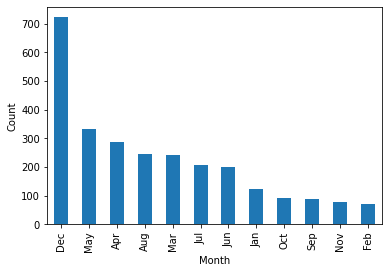

In [130]:
df['month_of_availability'].value_counts()[1:].plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count');

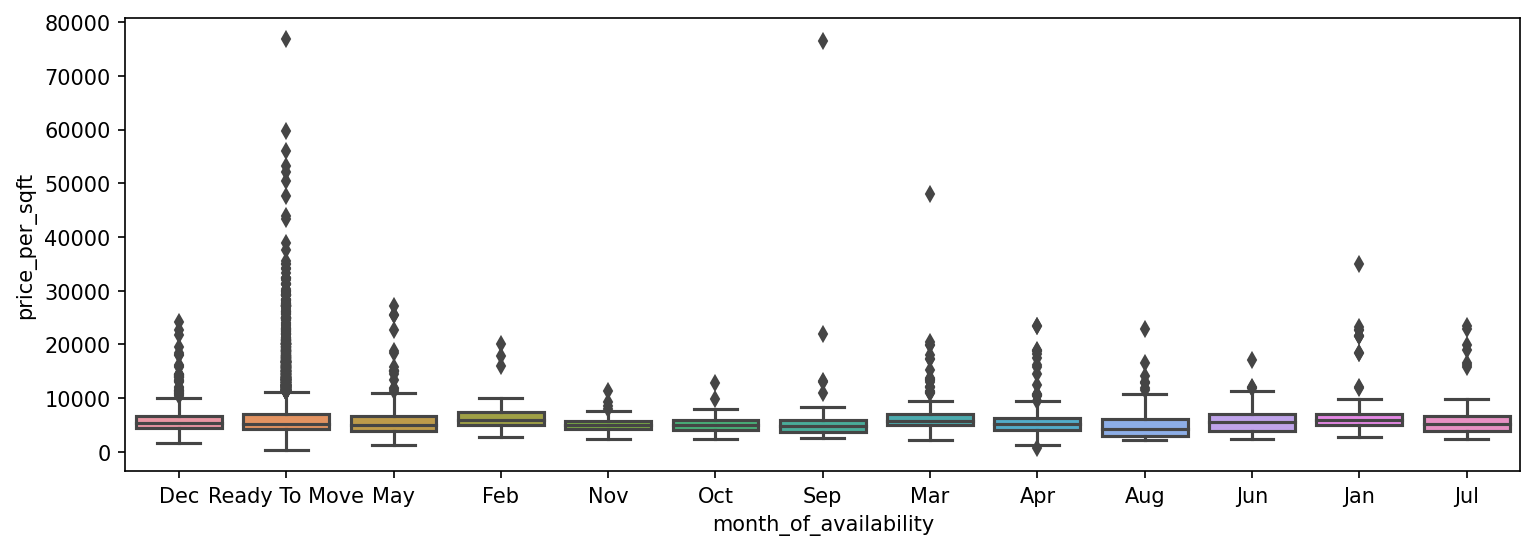

In [157]:
plt.figure(figsize=(12,4),dpi=150)
sns.boxplot(data=df,x='month_of_availability',y='price_per_sqft');

In [131]:
df.corr()

,size,total_sqft,bath,balcony,price_per_sqft
size,1.000000,0.519837,0.859046,0.127106,0.297235
total_sqft,0.519837,1.000000,0.525829,0.057694,0.207162
bath,0.859046,0.525829,1.000000,0.131590,0.332315
balcony,0.127106,0.057694,0.131590,1.000000,-0.020328
price_per_sqft,0.297235,0.207162,0.332315,-0.020328,1.000000


In [133]:
rtm = df.copy()

In [134]:
def fill_rtm(x):
    if x=='Ready To Move':
        return x
    else:
        return 'some other month'
rtm['rtm'] = rtm['month_of_availability'].apply(fill_rtm)

<AxesSubplot:xlabel='rtm', ylabel='price_per_sqft'>

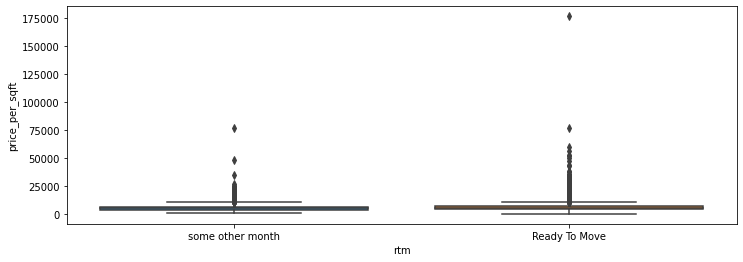

In [136]:
plt.figure(figsize=(12,4))
sns.boxplot(x='rtm',y='price_per_sqft',data=rtm)

An outlier is present in the data. Let's remove it

In [138]:
rtm['price_per_sqft'].max(),rtm['price_per_sqft'].idxmax()

(176470.58823529413, 7657)

In [140]:
rtm.drop(rtm['price_per_sqft'].idxmax(),inplace=True)
df.drop(df['price_per_sqft'].idxmax(),inplace=True)

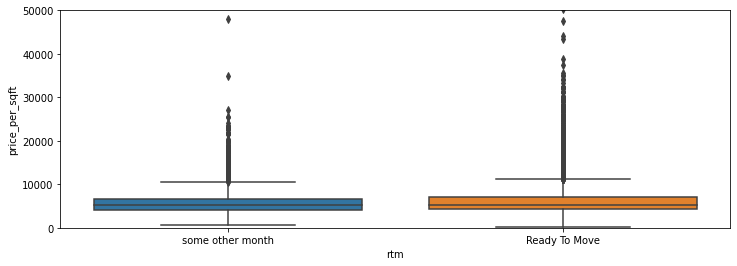

In [143]:
plt.figure(figsize=(12,4))
sns.boxplot(x='rtm',y='price_per_sqft',data=rtm)
plt.ylim(0,50000);

Even though 'Ready To Move' has a higher mean 'price_per_sqft' it's interquartile range is very similar to that of 'some other month'

In [144]:
df.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'house_type', 'price_per_sqft', 'month_of_availability'],
      dtype='object')

In [151]:
df.groupby('area_type').mean()

,size,total_sqft,bath,balcony,price_per_sqft
area_type,,,,,
Built-up Area,2.740804,1643.882378,2.609068,1.408469,5971.551936
Carpet Area,2.609756,1333.371951,2.475610,1.378049,6853.554796
Plot Area,3.428467,2224.382482,3.399270,1.217518,10765.885561
Super built-up Area,2.507331,1484.343700,2.410882,1.604009,5672.832447


<AxesSubplot:xlabel='area_type', ylabel='price_per_sqft'>

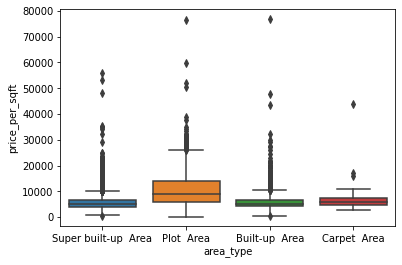

In [145]:
sns.boxplot(x='area_type',y='price_per_sqft',data=df)

'Plot Area' - the area that has only a boundary line - goes for a higher price. This shows that places that dont have a house built yet go for a higher price.

In [146]:
def built(x):
    if x=='Plot Area':
        return 'Not built'
    return 'Built'
df['Built/Not Built'] = df['area_type'].apply(built)

In [152]:
df

,area_type,location,size,total_sqft,bath,balcony,house_type,price_per_sqft,month_of_availability,Built/Not Built
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,BHK,3699.810606,Dec,Built
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,Bedroom,4615.384615,Ready To Move,Built
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,BHK,4305.555556,Ready To Move,Built
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,BHK,6245.890861,Ready To Move,Built
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,BHK,4250.000000,Ready To Move,Built
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5,3453.0,4.0,0.0,Bedroom,6689.834926,Ready To Move,Built
13316,Super built-up Area,other,4,3600.0,5.0,0.0,BHK,11111.111111,Ready To Move,Built
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,BHK,5258.545136,Ready To Move,Built
13318,Super built-up Area,Padmanabhanagar,4,4689.0,4.0,1.0,BHK,10407.336319,Jun,Built


In [153]:
df.drop('location',axis=1,inplace=True)

In [154]:
df

,area_type,size,total_sqft,bath,balcony,house_type,price_per_sqft,month_of_availability,Built/Not Built
0,Super built-up Area,2,1056.0,2.0,1.0,BHK,3699.810606,Dec,Built
1,Plot Area,4,2600.0,5.0,3.0,Bedroom,4615.384615,Ready To Move,Built
2,Built-up Area,3,1440.0,2.0,3.0,BHK,4305.555556,Ready To Move,Built
3,Super built-up Area,3,1521.0,3.0,1.0,BHK,6245.890861,Ready To Move,Built
4,Super built-up Area,2,1200.0,2.0,1.0,BHK,4250.000000,Ready To Move,Built
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,5,3453.0,4.0,0.0,Bedroom,6689.834926,Ready To Move,Built
13316,Super built-up Area,4,3600.0,5.0,0.0,BHK,11111.111111,Ready To Move,Built
13317,Built-up Area,2,1141.0,2.0,1.0,BHK,5258.545136,Ready To Move,Built
13318,Super built-up Area,4,4689.0,4.0,1.0,BHK,10407.336319,Jun,Built


In [159]:
df_enc = df.copy()

In [173]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,normalize

In [161]:
le = LabelEncoder()
df_enc['month_of_availability'] = le.fit_transform(df_enc['month_of_availability'])
le = LabelEncoder()
df_enc['area_type'] = le.fit_transform(df_enc['area_type'])

In [166]:
df_enc['Built/Not Built'] =  pd.get_dummies(df_enc['Built/Not Built'])

In [167]:
df_enc['house_type'] = pd.get_dummies(df_enc['house_type'])

In [168]:
df_enc

,area_type,size,total_sqft,bath,balcony,house_type,price_per_sqft,month_of_availability,Built/Not Built
0,3,2,1056.0,2.0,1.0,1,3699.810606,2,1
1,2,4,2600.0,5.0,3.0,0,4615.384615,11,1
2,0,3,1440.0,2.0,3.0,1,4305.555556,11,1
3,3,3,1521.0,3.0,1.0,1,6245.890861,11,1
4,3,2,1200.0,2.0,1.0,1,4250.000000,11,1
...,...,...,...,...,...,...,...,...,...
13315,0,5,3453.0,4.0,0.0,0,6689.834926,11,1
13316,3,4,3600.0,5.0,0.0,1,11111.111111,11,1
13317,0,2,1141.0,2.0,1.0,1,5258.545136,11,1
13318,3,4,4689.0,4.0,1.0,1,10407.336319,6,1


In [171]:
sc = StandardScaler()
X = df_enc.values
X_scaled = sc.fit_transform(X)

In [175]:
from sklearn.cluster import KMeans

In [192]:
km = KMeans(n_clusters=4)
df_enc['cluster'] = km.fit_predict(X_scaled)

In [193]:
df_enc

,area_type,size,total_sqft,bath,balcony,house_type,price_per_sqft,month_of_availability,Built/Not Built,cluster
0,3,2,1056.0,2.0,1.0,1,3699.810606,2,1,1
1,2,4,2600.0,5.0,3.0,0,4615.384615,11,1,2
2,0,3,1440.0,2.0,3.0,1,4305.555556,11,1,3
3,3,3,1521.0,3.0,1.0,1,6245.890861,11,1,0
4,3,2,1200.0,2.0,1.0,1,4250.000000,11,1,0
...,...,...,...,...,...,...,...,...,...,...
13315,0,5,3453.0,4.0,0.0,0,6689.834926,11,1,2
13316,3,4,3600.0,5.0,0.0,1,11111.111111,11,1,2
13317,0,2,1141.0,2.0,1.0,1,5258.545136,11,1,3
13318,3,4,4689.0,4.0,1.0,1,10407.336319,6,1,2


In [194]:
df['cluster'] = df_enc['cluster']

In [195]:
df

,area_type,size,total_sqft,bath,balcony,house_type,price_per_sqft,month_of_availability,Built/Not Built,cluster
0,Super built-up Area,2,1056.0,2.0,1.0,BHK,3699.810606,Dec,1,1
1,Plot Area,4,2600.0,5.0,3.0,Bedroom,4615.384615,Ready To Move,1,2
2,Built-up Area,3,1440.0,2.0,3.0,BHK,4305.555556,Ready To Move,1,3
3,Super built-up Area,3,1521.0,3.0,1.0,BHK,6245.890861,Ready To Move,1,0
4,Super built-up Area,2,1200.0,2.0,1.0,BHK,4250.000000,Ready To Move,1,0
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,5,3453.0,4.0,0.0,Bedroom,6689.834926,Ready To Move,1,2
13316,Super built-up Area,4,3600.0,5.0,0.0,BHK,11111.111111,Ready To Move,1,2
13317,Built-up Area,2,1141.0,2.0,1.0,BHK,5258.545136,Ready To Move,1,3
13318,Super built-up Area,4,4689.0,4.0,1.0,BHK,10407.336319,Jun,1,2


<AxesSubplot:xlabel='area_type', ylabel='price_per_sqft'>

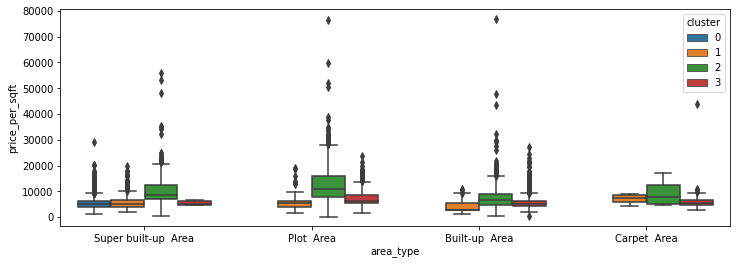

In [196]:
plt.figure(figsize=(12,4))
sns.boxplot(x='area_type',y='price_per_sqft',hue='cluster',data=df)

<AxesSubplot:xlabel='total_sqft', ylabel='price_per_sqft'>

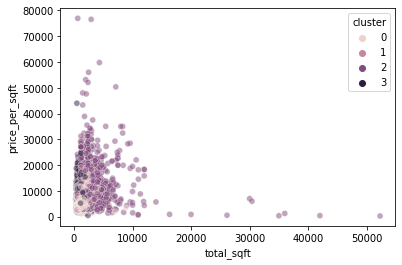

In [197]:
sns.scatterplot(x='total_sqft',y='price_per_sqft',data=df,hue='cluster',alpha=0.5)

In [198]:
from sklearn.decomposition import PCA

In [201]:
X.shape

(12520, 9)

In [207]:
pc = PCA(n_components=5)
pc.fit(X_scaled)

PCA(n_components=5)

In [209]:
pc.explained_variance_ratio_.sum()

0.8491062030967739

In [215]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(PCA(n_components=5),KMeans(n_clusters=2))
df['cluster'] = model.fit_predict(X_scaled)

Amenties --> size, balcony and bath

<AxesSubplot:ylabel='price_per_sqft'>

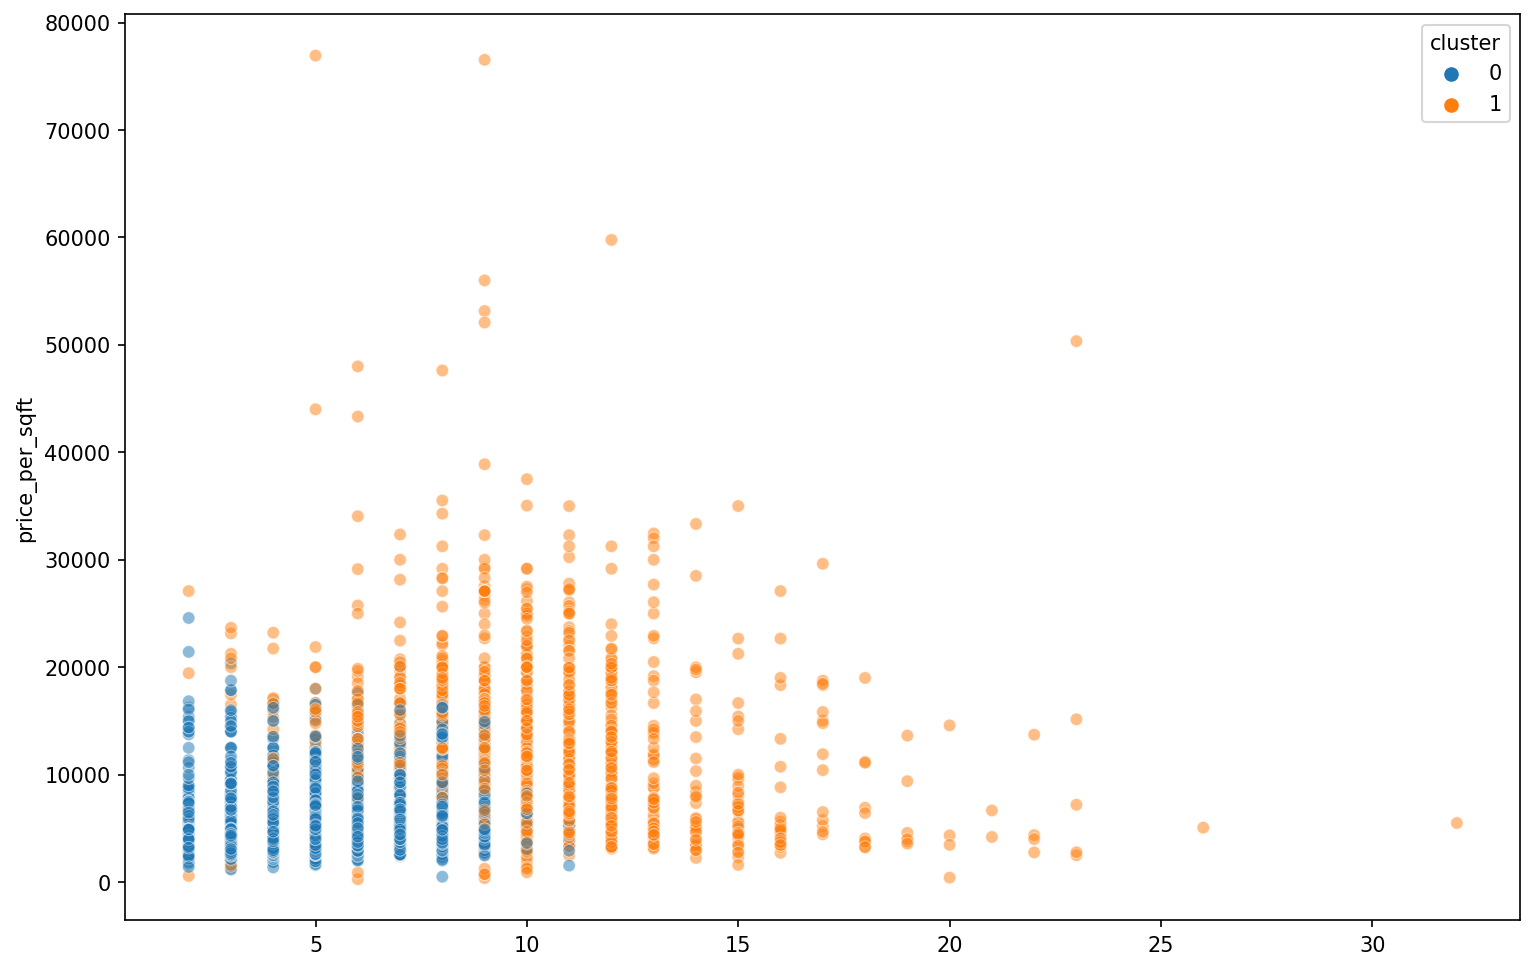

In [219]:
#amenities score
plt.figure(figsize=(12,8),dpi=150)
sns.scatterplot(x=df['size']+df['balcony']+df['bath'],y='price_per_sqft',data=df,hue='cluster',alpha=0.5)